##Install detectron2

In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Requirement already up-to-date: torch==1.5 in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6 in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
     |████████████████████████████████| 276kB 12.4MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=19eb7aa19a85149f091cf59aee3efdbb013c0c4d0b87fe171f1115c532bfcbb7
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-vxr_492o
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-vxr_492o
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-li

In [3]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 600kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200604-cp36-none-any.whl size=41027 sha256=3bf6afb66f6d224149dae4697d4c6890bf845a4561515bfa12816b5fd26473e1
  Stored in directory: /root/.cache/pip/wheels/87/51/87/c4424ab2e6d62ec441b6e623c21a1c15523516c34c923474cd
Successfully built fvcore


In [0]:
import detectron2
import cv2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

##Download an image from COCO dataset

--2020-06-04 02:16:41--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.141.188
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.141.188|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K   290KB/s    in 0.7s    

2020-06-04 02:16:42 (290 KB/s) - ‘input.jpg’ saved [209222/209222]



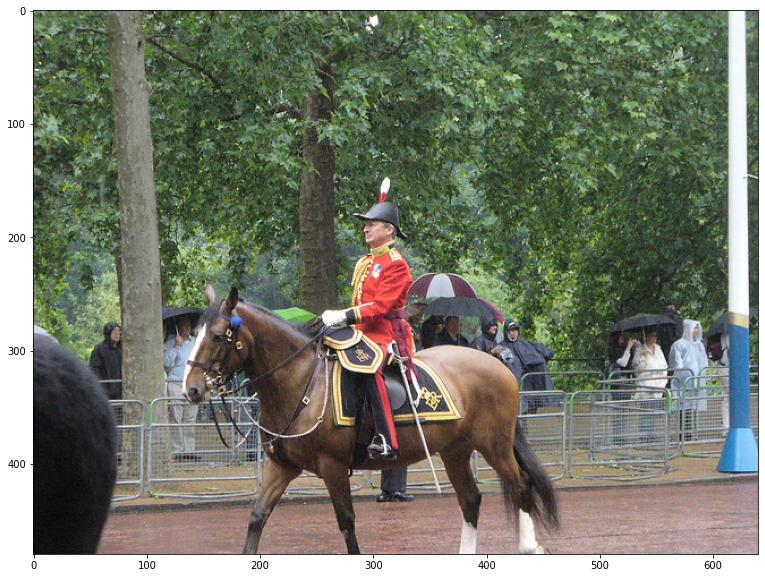

In [17]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")
plt.figure(figsize=(20,10))
plt.imshow(im[:,:,::-1])

##Create a detectron2 config and a detectron2 DefaultPredictor to run inference on the image

In [6]:
# Inference with a object detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# If your detectron2's version is not the most updated, please use direct link as followed, to get the link , please visit 
# https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md

# cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"

predictor = DefaultPredictor(cfg)

model_final_280758.pkl: 167MB [00:16, 9.98MB/s]                           


##Predict the image

In [0]:
outputs = predictor(im)

In [19]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25, 25, 25,  0,  0, 25,  0, 25,
         0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  1,  0, 25,  0,  0,
         0,  0,  0,  0, 20, 17,  0, 26, 25], device='cuda:0')
Boxes(tensor([[1.3239e+02, 2.4653e+02, 4.6741e+02, 4.8000e+02],
        [5.6133e+02, 2.7338e+02, 5.9710e+02, 3.7923e+02],
        [1.1451e+02, 2.6593e+02, 1.4855e+02, 3.9579e+02],
        [2.4369e+02, 1.6038e+02, 3.3850e+02, 4.1253e+02],
        [5.0001e+01, 2.7415e+02, 8.0259e+01, 3.6107e+02],
        [2.6122e-01, 2.7869e+02, 7.7842e+01, 4.7553e+02],
        [3.8505e+02, 2.7143e+02, 4.1304e+02, 3.0280e+02],
        [5.2288e+02, 2.8018e+02, 5.6087e+02, 3.4593e+02],
        [4.0411e+02, 2.7350e+02, 4.5752e+02, 3.5780e+02],
        [3.4594e+02, 2.6934e+02, 3.8567e+02, 2.9869e+02],
        [5.0916e+02, 2.6604e+02, 5.7086e+02, 2.8608e+02],
        [3.3195e+02, 2.5116e+02, 4.1506e+02, 2.7485e+02],
        [3.2884e+02, 2.3110e+02, 4.0571e+02, 2.7384e+02],
        [5.0649e+0

In [20]:
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
preds

['horse',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'umbrella',
 'umbrella',
 'umbrella',
 'person',
 'person',
 'umbrella',
 'person',
 'umbrella',
 'person',
 'person',
 'person',
 'person',
 'person',
 'backpack',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'bicycle',
 'person',
 'umbrella',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'elephant',
 'horse',
 'person',
 'handbag',
 'umbrella']

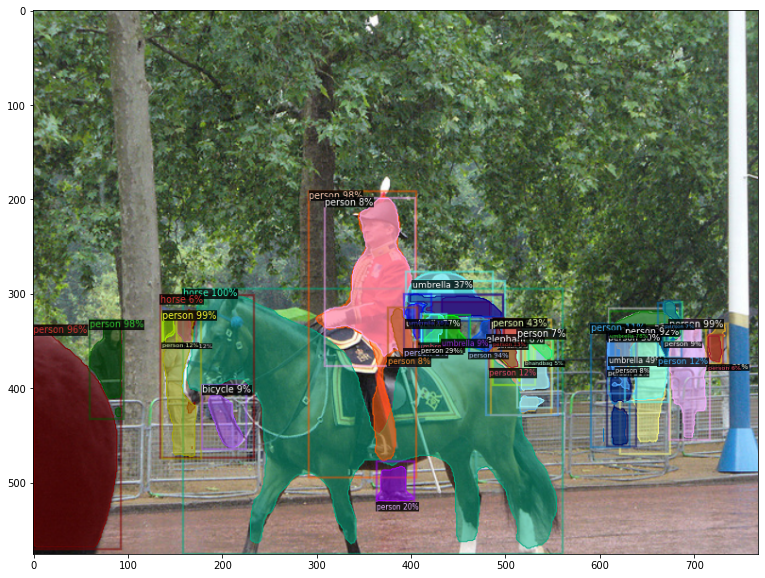

In [21]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

##Instance Segmentation

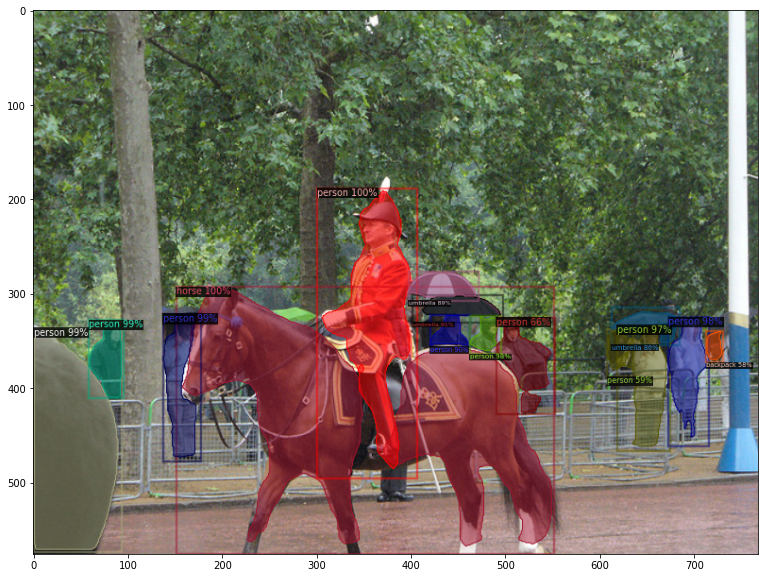

In [22]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
#cfg.MODEL.WEIGHTS = './model_final_f10217.pkl'
predictor = DefaultPredictor(cfg)

outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

##Keypoint Detection

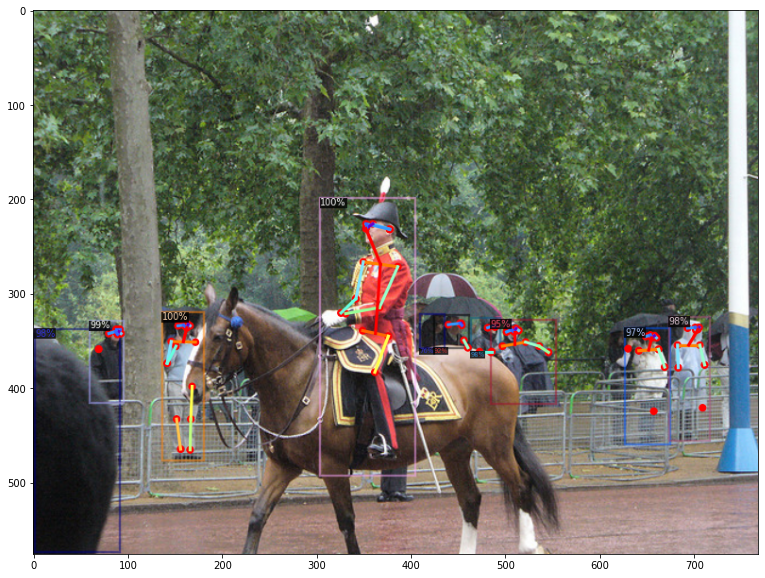

In [23]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

##Panoptic segmentation

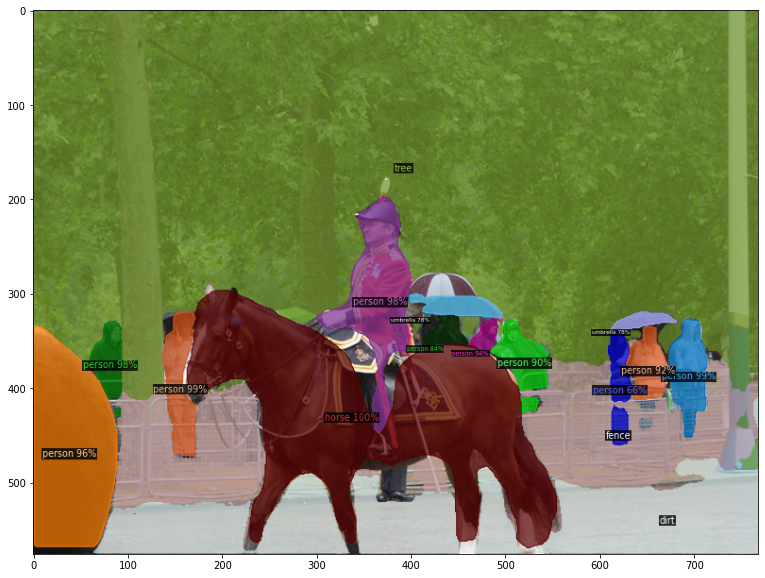

In [24]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

Reference: https://github.com/facebookresearch/detectron2  